**SIMPLE LINEAR REGRESSION**

Simple linear regression is a statistical method used to model the relationship between a single independent variable and a dependent variable. It is called "simple" because it only involves one independent variable. The goal of simple linear regression is to find the line of best fit that minimizes the sum of the squared differences between the actual and predicted values of the dependent variable. The line of best fit is represented by an equation, called the regression equation, that be used to make predictions about the dependent variable based on a given value of the independent variable.

**OBJECTIVE**

Simple linear regression is used to model the relationship between a single independent variable and a dependent variable. In this case, the independent variable is "comb (L/100km)" and the dependent variable is "fuel consumption".Here comb (L/100km) is a measure of fuel consumption and represents the amount of fuel used by a vehicle in 100 kilometers of driving.

If there is a significant relationship between the two variables, linear regression can be used to model this relationship and make predictions about fuel consumption based on comb (L/100km).





**ASSUMPTION:**
1. Linearity: The relationship between the independent and dependent variables should be linear.

2. Homoscedasticity: The variance of the errors should be constant across all values of the independent variables.

3. Normality: To check whether the dependent variable as well independent variable follows a normal distribution.

**IMPORTING THE DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data = pd.read_csv("/content/Fuel_Consumption_2000-2022.csv")

Displaying the first 4 rows of the dataset.

In [ ]:
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


**EXPLORATORY ANALYSIS**

In [ ]:
data.shape

(22556, 13)

The shape function is used to display the number of rows and columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


 The info function is used to display the features null values and number values in a features and its data type. In our dataset there is no null values.

In [ ]:
data.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


The describe function is used to display the features descriptive statistics.


**FINDING OUTLIERS**

By plotting the box plot we can find the outliears.

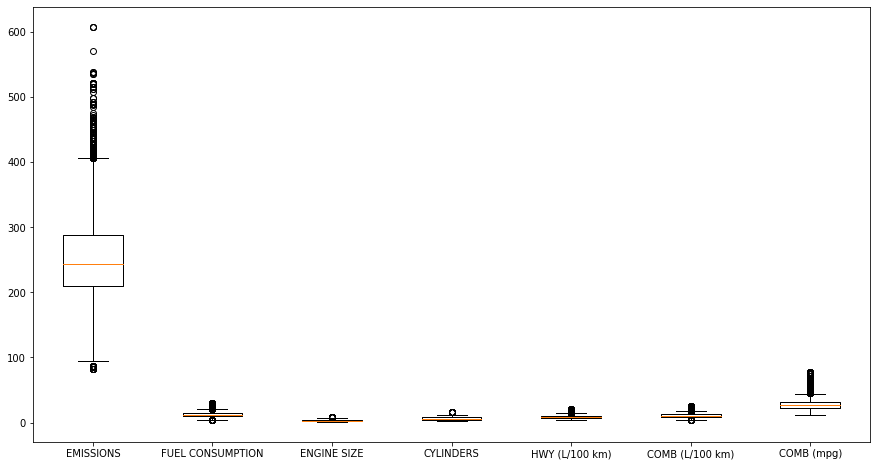

In [ ]:
plt.figure(figsize=(15,8))
data2 = data["EMISSIONS"], data["FUEL CONSUMPTION"],data['ENGINE SIZE'],data['CYLINDERS'],data['HWY (L/100 km)'],data['COMB (L/100 km)'],data['COMB (mpg)']
plt.boxplot(data2, labels=['EMISSIONS','FUEL CONSUMPTION','ENGINE SIZE','CYLINDERS','HWY (L/100 km)','COMB (L/100 km)','COMB (mpg)'])
plt.show()

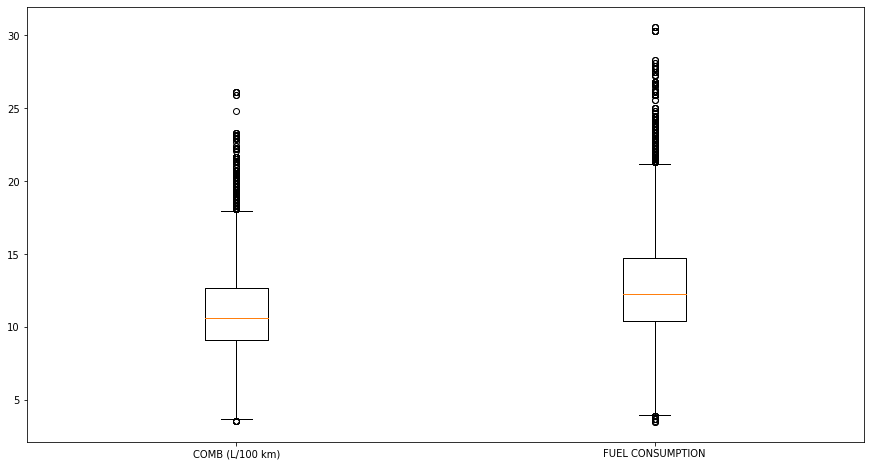

In [ ]:
data2 = data["COMB (L/100 km)"], data["FUEL CONSUMPTION"]
plt.figure(figsize=(15,8))
plt.boxplot(data2, labels=['COMB (L/100 km)','FUEL CONSUMPTION'])
plt.show()

**HANDLING OUTLIERS**

In [ ]:
outlier = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier.append(i)
    return outlier

In [ ]:
# checking outliears for Emission.
sample_outliers = detect_outliers_iqr(data['COMB (L/100 km)'])
Q1, Q3 = data["COMB (L/100 km)"].quantile([0.25,0.75])
LCL = Q1 - 1.5 * (Q3 - Q1)
UCL = Q3 + 1.5 * (Q3 - Q1)
print("Upper bound = ", round(UCL))
print("Lower bound = ", round(LCL))

Upper bound =  18
Lower bound =  4


In [ ]:
# Handling outlier for emissions.
data["COMB (L/100 km)"] = data["COMB (L/100 km)"].map(
    lambda x: 18 if x > 18 else x
)
data["COMB (L/100 km)"] = data["COMB (L/100 km)"].map(
    lambda x: 4 if x < 4 else x
)

The outliers are handled by outlier capped at a certain value above 18th percentile value or floored at a factor  below 4th percentile value.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


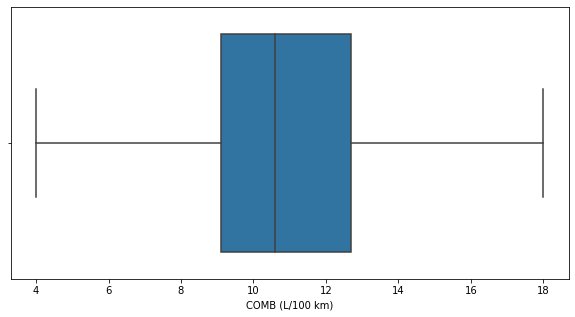

In [ ]:
# boxplot after handling the COMB (L/100 km).
plt.figure(figsize=(10,5))
sns.boxplot(data['COMB (L/100 km)'])
plt.show()

In [ ]:
# checking outliears for FUEL CONSUMPTION.
sample_outliers = detect_outliers_iqr(data['FUEL CONSUMPTION'])
Q1, Q3 = data["FUEL CONSUMPTION"].quantile([0.25,0.75])
LCL = Q1 - 1.5 * (Q3 - Q1)
UCL = Q3 + 1.5 * (Q3 - Q1)
print("Upper bound = ", round(UCL))
print("Lower bound = ", round(LCL))

Upper bound =  21
Lower bound =  4


In [ ]:
# Handling outlier for emissions.
data["FUEL CONSUMPTION"] = data["FUEL CONSUMPTION"].map(
    lambda x: 21 if x > 21 else x
)
data["FUEL CONSUMPTION"] = data["FUEL CONSUMPTION"].map(
    lambda x: 4 if x < 4 else x
)

The outliers are handled by the outlier is capped at a certain value above 21th percentile value or floored at a factor  below 4th percentile value.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


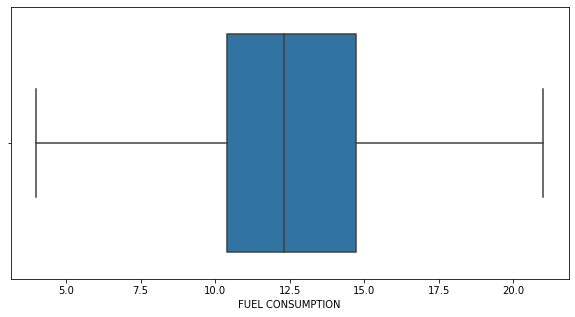

In [ ]:
# boxplot after handling the emissions.
plt.figure(figsize=(10,5))
sns.boxplot(data['FUEL CONSUMPTION'])
plt.show()

There is no outlier after handeling the outlier.

**PLOTTING CORRELATION MATRIX**

A correlation matrix is a table showing the correlation between multiple variables. The purpose of a correlation matrix is to analyze the strength and direction of the relationships between variables.

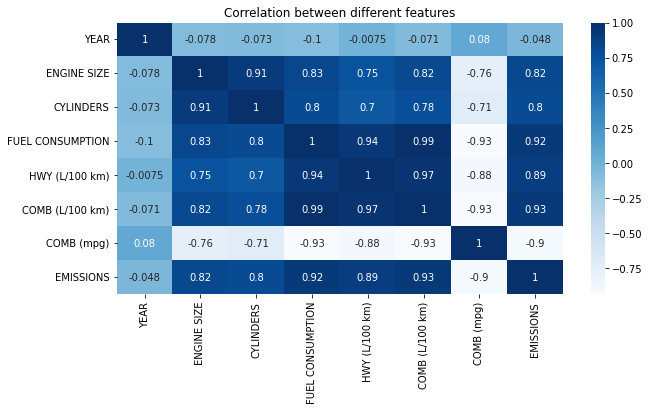

In [ ]:
data_corr = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data_corr, cmap="Blues", annot=True)
plt.title('Correlation between different features')
plt.show()

**SIMPLE LINEAR REGRESSION**

Selecting the target and independent features.

In [ ]:
y = data["FUEL CONSUMPTION"]
x = data["COMB (L/100 km)"]

**SCATTER PLOT**

The scatter plot is plotted to check the linearity of the relationship.

In [ ]:
plt.scatter(x,y)
plt.title('COMB (L/100 km) against FUEL CONSUMPTION')
plt.xlabel('COMB (L/100 km)')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

And as we can see the both target and fuel consumption feature are linearly distributed. Therefore Linearity assumption is satisfied.


---



**PLOTTING DISTRIBUTION PLOT**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


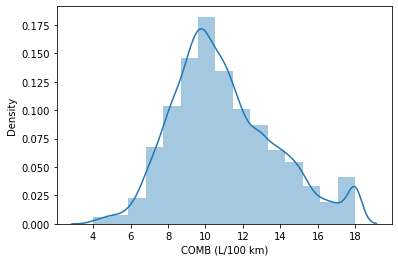

In [ ]:
fig = plt.figure()
sns.distplot(data["COMB (L/100 km)"],bins=15)
plt.show()

**INFERENCE:**  COMB (L/100 km) feature in the dataset is normally distributed. We can infer this from the distribution plot and the normality condition is satisfied.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


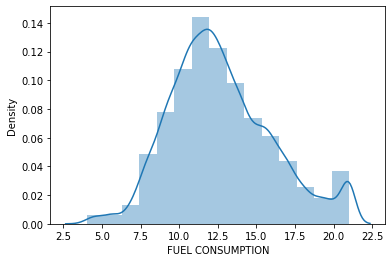

In [ ]:
fig = plt.figure()
sns.distplot(data["FUEL CONSUMPTION"],bins=15)
plt.show()

**INFERENCE:** Fuel consumption feature in the dataset is normally distributed. We can infer this from the distributionplot  and the normality condition is satisfied.

**SPLITTING THE DATA INTO TRAIN AND TEST**

Splitting the data into train and test sets is a common step in the process of building a predictive model. The purpose of splitting the data is to have a portion of the data to train the model and another portion to evaluate its performance.The training set is used to train the model, while the testing set is used to evaluate the model's performance. The most common split is to use 80% of the data for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8 , test_size=0.2,random_state = 10)

In [ ]:
x_train.astype(int)

4636      9
10670    12
6387      9
18994    10
11438    12
         ..
9372     10
7291     13
17728     9
7293     12
17673    14
Name: COMB (L/100 km), Length: 18044, dtype: int64

In [ ]:
y_train.astype(int)

4636     10
10670    14
6387     10
18994    11
11438    14
         ..
9372     11
7291     15
17728    10
7293     14
17673    17
Name: FUEL CONSUMPTION, Length: 18044, dtype: int64

In [ ]:
x_test.astype(int)

19116     8
11016     9
15481    10
824      13
13397     6
         ..
13233     7
20579     9
3551      8
12605    16
9984      8
Name: COMB (L/100 km), Length: 4512, dtype: int64

In [ ]:
y_test.astype(int)

19116     9
11016    10
15481    12
824      15
13397     8
         ..
13233     8
20579    10
3551     10
12605    19
9984     10
Name: FUEL CONSUMPTION, Length: 4512, dtype: int64

**BUILDING THE MODEL**

The statsmodels library in Python is commonly used for statistical modeling and hypothesis testing. It includes functions for linear regression, including simple linear regression.

In [ ]:
import statsmodels.api as lm

The simple linear equation y = β0 + β1x has a  it has intercept value β0, therefore we adding the intercept value.

In [ ]:
x_train_lm = lm.add_constant(x_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The sm.OLS function is used to fit an ordinary least squares (OLS) regression model. The fit method is used to fit the model to the data.

In [ ]:
model = lm.OLS(y_train,x_train_lm).fit()

The coefficient of the independent variable and intercept is found.

In [ ]:
model.params

const             -0.414741
COMB (L/100 km)    1.194215
dtype: float64

The summary of the model is displayed.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FUEL CONSUMPTION   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.274e+06
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:17:02   Log-Likelihood:                -8894.2
No. Observations:               18044   AIC:                         1.779e+04
Df Residuals:                   18042   BIC:                         1.781e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4147      0.012    -34.539      0.000      -0.438      -0.391
COMB (L/100 km)     1.1942      0.001   1128.504      0.000       1.192       1.196
==============================================================================
Omnibus:                     1179.600   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2322.648
Skew:                          -0.463   Prob(JB):                         0.00
Kurtosis:                       4.494   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r^2 value is 98.6% indicates the model express the output well. And adjusted-square value is 98.6% the fuel consumption variance can be expressed COMB (L/100 km) using this line.The p value for F-statistic is less than of
0.05 and it is concluded that regression coefficents are significant (not equal to zero). The Durbin-Watson test is a statistical test used to detect autocorrelation in errors. It is value 2 indicating there is no autocorrelation.

**Visualising the fitted line to  train dataset**

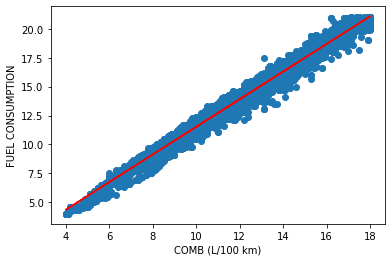

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train ,  -0.4147+1.1942*x_train, 'r')
plt.xlabel('COMB (L/100 km)')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

The red line is the fitted line where the equation is
FUEL CONSUMPTION = y = -0.4147 + 1.1942*COMB (L/100 km).

**predicting using train dataset**

In [ ]:
y_train_pred = model.predict(x_train_lm)
resid = (y_train - y_train_pred)
resid

4636     0.066804
10670    0.064737
6387    -0.269146
18994   -0.085676
11438    0.084159
           ...   
9372     0.053167
7291     0.170522
17728   -0.010882
7293     0.148208
17673    0.159778
Length: 18044, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


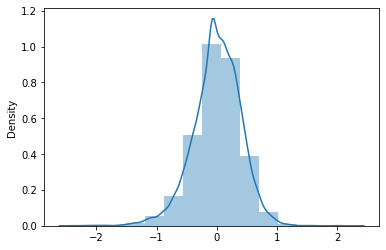

In [ ]:
fig = plt.figure()
sns.distplot(resid,bins=15)
plt.show()

**INFERENCE:** The residuals are normally distributed.

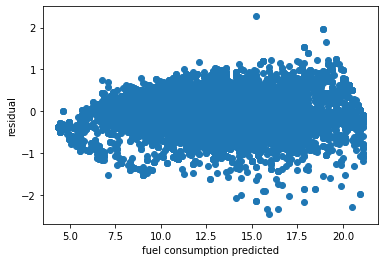

In [ ]:
plt.scatter(y_train_pred,resid)
plt.xlabel("fuel consumption predicted")
plt.ylabel("residual")
plt.show()

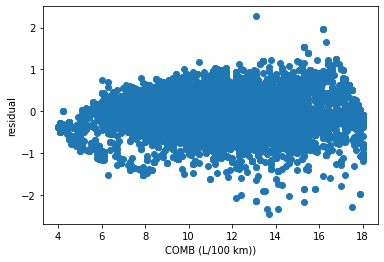

In [ ]:
plt.scatter(x_train,resid)
plt.xlabel("COMB (L/100 km))")
plt.ylabel("residual")
plt.show()

Text(0.5, 1.0, 'Normal Q-Q Plot')

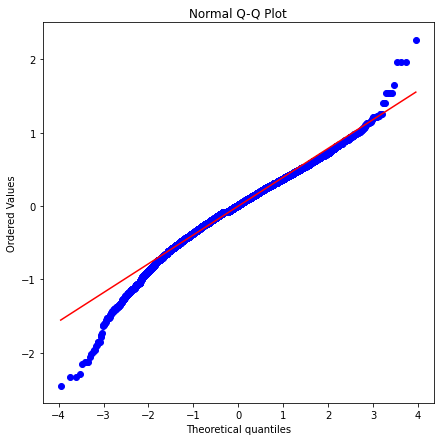

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(7,7))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

**Predicting using the test dataset.**

In [ ]:
x_test_lm = lm.add_constant(x_test)
y_test_pred = model.predict(x_test_lm)
y_test_pred.astype(int)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


19116     9
11016    10
15481    12
824      15
13397     7
         ..
13233     8
20579    10
3551     10
12605    19
9984     10
Length: 4512, dtype: int64

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9853610335689378

An R-squared value of 0.98 indicates that the independent variable(s) in a regression model explain 98% of the variability in the dependent variable.

**Visualising the fitted line to  train dataset**

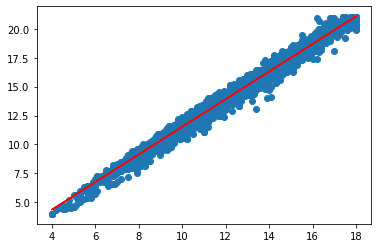

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

0.1607925363576144

**CONCLUSION:**
An R-squared value of 0.98 indicates that 98% of the variance in the dependent variable (fuel consumption) can be explained by the independent variable (engine displacement). This is a high R-squared value, which suggests a strong relationship between engine displacement and fuel consumption.

A mean squared error (MSE) of 0.1607925363576144 suggests that on average, the model's predictions are off by 0.16 units of the dependent variable (fuel consumption).

In conclusion, the high R-squared value and relatively low MSE suggest that the simple linear regression model is a good fit for the data and provides a strong relationship between engine displacement and fuel consumption.